Рассматривается движение автомобиля с постоянной линейной скоростью и ограниченно изменяющейся угловой скоростью, которая является управлением. Выбраны начальные и конечные положения и орентация на плоскости. Ставится задача быстродействия. 
Пусть положение машины описывается тремя переменными: $x,y,\theta$, где $\theta$ описывает орентацию.Тогда динамика системы описывается следующими уравнениями:
\begin{equation*}
 \begin{cases}
  \dot{x} =\cos{\theta},
   \\
   \dot{y} = \sin{\theta},
   \\
   \dot{\theta} = u.
   \end{cases}
\end{equation*}
\
Начальные условия имеют вид:
\begin{equation*}
X(t=0) = 
 \begin{cases}
  x(0) = x_0,
   \\
   y(0) = y_0,
   \\
   \theta(0) = \theta_0.
   \end{cases}
\end{equation*}
Терминальные многообразие:
\begin{equation*}
X(t=t_f) = 
 \begin{cases}
  x(t_f) = x_f,
   \\
  y(t_f) = y_f,
   \\
   \theta(t_f) = \theta_f.
   \end{cases}
\end{equation*}

Требуется найти закон изменения управления (функцию $u(t)$),чтобы  обеспечить минимальное время достижения заданного финального положения X($t=t_f$):
$$Ф(x(t_f),t_f) = t_f → {\underset{u}{min}} $$

Функция Гамильтона-Понтрягина:
$$ H = p_x\cdot \cos{\theta} + p_y\cdot \sin{\theta} + p_{\theta} \cdot u + 1  $$

Тогда уравнения на сопряженные переменные примут вид:
\begin{equation*}
 \begin{cases}
  \dot{p_x} = 0,
   \\
   \dot{p_y} = 0,
   \\
   \dot{p_{\theta}} = p_x \cdot \sin{\theta} - p_y \cdot \cos{\theta}.
  \end{cases}
\end{equation*}
\
причем:
\begin{equation*}
 \begin{cases}
  p_x = C_1,
   \\
  p_y = C_2,
   \\
  \dot{p_{\theta}} = C_1 \cdot \sin{\theta} - C_2 \cdot \cos{\theta}.
  \end{cases}
\end{equation*}

Условие экстремума :
$$ \frac{\partial H}{\partial u} = p_{\theta} = 0$$
\
Тогда оптимальное управление задается формулой:
$$ u^* = 1 \cdot sign(p_{\theta}(t)) $$

Таким образом, вся траектория состоит из участков, где управление принимает значение из множества $\{-1,0,1\}$. В $\href{https://www.researchgate.net/publication/264960433_On_Curves_of_Minimal_Length_with_a_Constraint_on_Average_Curvature_and_with_Prescribed_Initial_and_Terminal_Positions_and_Tangents}{статье}$ показано, что между любыми двумя точками кратчайший путь для машины всегда может быть выражен комбинацией не более чем трех участков движения с различным управлениями. На каждом участке применяется постоянное управление в течение определенного интервала времени. Приняты следующие обозначения на участках:
* S: u = 0 соответствует прямолинейному движению
* L: u = 1 соответствует повороту налево (против часовой стрелки) по окружности радиуса 1
* R: u = -1 соответствует повороту направо (по часовой стрелке) по окружности радиуса 1

Используя эти обозначения, каждый возможный вид кратчайшего пути может быть обозначен как последовательность из трех символов(слово), соответствующая порядку применения управления. При этом возможны десять возможных слов длины 3. Показано (ссылка на статью выше), что оптимальными могут быть только эти шесть слов:
$$\{LRL, RLR, LSL, LSR, RSL, RSR\}$$

Каждому участку пути соответствует оператор, преобразующий исходную точку в точку после прохождения участка. Координата каждой точки задается набором $\{x,y,\theta\}$. Тогда соответсвующие операторы имеют вид:
* $L_v(x,y,\theta) = (x + \sin{(\theta + v)} - \sin{\theta}, y - \cos{(\theta + v)} + \cos{\theta}, \theta + v$)
* $R_v(x,y,\theta) = (x - \sin{(\theta - v)} + \sin{\theta}, y + \cos{(\theta - v)} - \cos{\theta}, \theta - v$)
* $S_v(x,y,\theta) = ( x + v\cdot \cos{\theta}, y + v \cdot \sin{\theta}, \theta) $
\
где $v$ - длина конкретного сегмента


Тогда если длины участков равны p,q,t соответсвенно, тогда полная длина траектории равна:
$$ \Delta = t + p + q$$

Относительное положение между двумя точками определяется тремя переменными $(\alpha, \beta, d)$, где $\alpha$ - направление в первой точке, $\beta$ - направление во второй точке, $d$ - расстояние между точками.
Тогда зная эти параметры, можно получить выражение для преобразования, проводимое каждой из композиций указанных операторов(приведены в $\href{https://www.researchgate.net/publication/220142832_Classification_of_the_Dubins_set}{работе}$).


In [135]:
import matplotlib.pyplot as plt
import math
import numpy as np
from enum import Enum

class TurnType(Enum):
    LSL = 1
    LSR = 2
    RSL = 3
    RSR = 4
    RLR = 5
    LRL = 6

class Param:
    def __init__(self, p_init, seg_final, turn_radius):
        self.p_init = p_init
        self.seg_final = seg_final
        self.turn_radius = turn_radius
        self.type = 0

class Trajectory:
    def __init__(self, x, y):
        self.x = x
        self.y = y


def calcPath(pt1, pt2, curvature): 
    # pt1 - координаты начальной точки траектории
    # pt2 - координаты конечной точки траектории
    # curvature - допустимая кривизная дуги
 
    param = Param(pt1, 0, 0) # массив параметров траектории
    tz        = [0, 0, 0, 0, 0, 0] # массив длин первых участков
    pz        = [0, 0, 0, 0, 0, 0] # массив длин вторых участков
    qz        = [0, 0, 0, 0, 0, 0] # массив длин третьих участков
    param.seg_final = [0, 0, 0] # массив концов (по времени) каждого из сегментов
    
    #углы ориентации в граничных точках
    theta1 = np.deg2rad(pt1[2])
    theta2 = np.deg2rad(pt2[2])
    
    param.turn_radius = 1/curvature
    dx = pt2[0] - pt1[0] # общая разница по x
    dy = pt2[1] - pt1[1] # общая разница по y
    
    D = math.sqrt(dx*dx + dy*dy)
    d = D/param.turn_radius #нормализация по радиусу поворота

    # Углы, необходимые для расчета траекторий
    phi = math.atan2(dy,dx) % (2*math.pi)
    alpha = (theta1 - phi) % (2*math.pi)
    beta  = (theta2 - phi) % (2*math.pi)
    
    best_word = -1
    best_length = -1

    tz[0], pz[0], qz[0] = LSL(alpha,beta,d)
    tz[1], pz[1], qz[1] = LSR(alpha,beta,d)
    tz[2], pz[2], qz[2] = RSL(alpha,beta,d)
    tz[3], pz[3], qz[3] = RSR(alpha,beta,d)
    tz[4], pz[4], qz[4] = RLR(alpha,beta,d)
    tz[5], pz[5], qz[5] = LRL(alpha,beta,d)

    # выбираем самый короткий
    for x in range(6):
        if(tz[x]!=-1): # проверка на возможность такой компоизиции
            length = tz[x] + pz[x] + qz[x]
            if(length<best_length or best_length==-1):
                best_word = x+1
                best_length = length
                param.seg_final = [tz[x],pz[x],qz[x]]

    param.type = TurnType(best_word)
    return (param, length)

def scheme_traj(param):
    x = 0
    i = 0
    length = int((param.seg_final[0]+param.seg_final[1]+param.seg_final[2])*param.turn_radius)

    path = -1 * np.ones((length,3))

    while x < length:
        path[i] = calc_path(param,x)
        x += 1
        i+=1
    return path #массив концов каждого из сегментов 


def calc_path(param, t): # вычисление конца траектории

    t_rad = t/param.turn_radius # для удобства вычислений
    p_init = np.array([0,0, np.deg2rad(param.p_init[2])])
    L_SEG = 1
    R_SEG = 2
    S_SEG = 3
    DIRDATA = np.array([[L_SEG,S_SEG,L_SEG],[L_SEG,S_SEG,R_SEG],[R_SEG,S_SEG,L_SEG],\
                        [R_SEG,S_SEG,R_SEG],[R_SEG,L_SEG,R_SEG],[L_SEG,R_SEG,L_SEG]])
    #
    types = DIRDATA[param.type.value-1][:]
    param1 = param.seg_final[0]
    param2 = param.seg_final[1]
    mid_pt1 = calc_segment(param1,p_init,types[0])
    mid_pt2 = calc_segment(param2,mid_pt1,types[1])

    if(t_rad<param1):
        end_pt = calc_segment(t_rad,p_init,types[0])
    elif(t_rad<(param1+param2)):
        end_pt = calc_segment(t_rad-param1,mid_pt1,types[1])
    else:
        end_pt = calc_segment(t_rad-param1-param2, mid_pt2, types[2])

    end_pt[0] = end_pt[0] * param.turn_radius + param.p_init[0]
    end_pt[1] = end_pt[1] * param.turn_radius + param.p_init[1]
    end_pt[2] = end_pt[2] % (2*math.pi)

    return end_pt

def calc_segment(seg_param, seg_init, seg_type): #применение оператора
    L_SEG = 1
    R_SEG = 2
    S_SEG = 3
    seg_end = np.array([0.0,0.0,0.0])
    if( seg_type == L_SEG ):
        seg_end[0] = seg_init[0] + math.sin(seg_init[2]+seg_param) - math.sin(seg_init[2])
        seg_end[1] = seg_init[1] - math.cos(seg_init[2]+seg_param) + math.cos(seg_init[2])
        seg_end[2] = seg_init[2] + seg_param
    elif( seg_type == R_SEG ):
        seg_end[0] = seg_init[0] - math.sin(seg_init[2]-seg_param) + math.sin(seg_init[2])
        seg_end[1] = seg_init[1] + math.cos(seg_init[2]-seg_param) - math.cos(seg_init[2])
        seg_end[2] = seg_init[2] - seg_param
    elif( seg_type == S_SEG ):
        seg_end[0] = seg_init[0] + math.cos(seg_init[2]) * seg_param
        seg_end[1] = seg_init[1] + math.sin(seg_init[2]) * seg_param
        seg_end[2] = seg_init[2]

    return seg_end   

In [136]:
# вычисление композиций
def LSL(alpha, beta, d):
    tmp0      = d + math.sin(alpha) - math.sin(beta)
    tmp1      = math.atan2((math.cos(beta)-math.cos(alpha)),tmp0)
    p_squared = 2 + d*d - (2*math.cos(alpha-beta)) + (2*d*(math.sin(alpha)-math.sin(beta)))
    if p_squared<0:
        p=-1
        q=-1
        t=-1
    else:
        t         = (tmp1-alpha) % (2*math.pi)
        p         = math.sqrt(p_squared)
        q         = (beta - tmp1) % (2*math.pi)
    return t, p, q

def RSR(alpha, beta, d):
    tmp0      = d - math.sin(alpha) + math.sin(beta)
    tmp1      = math.atan2((math.cos(alpha)-math.cos(beta)),tmp0)
    p_squared = 2 + d*d - (2*math.cos(alpha-beta)) + 2*d*(math.sin(beta)-math.sin(alpha))
    if p_squared<0:
        p=-1
        q=-1
        t=-1
    else:
        t         = (alpha - tmp1 ) % (2*math.pi)
        p         = math.sqrt(p_squared)
        q         = (-1*beta + tmp1) % (2*math.pi)
    return t, p, q

def RSL(alpha,beta,d):
    tmp0      = d - math.sin(alpha) - math.sin(beta)
    p_squared = -2 + d*d + 2*math.cos(alpha-beta) - 2*d*(math.sin(alpha) + math.sin(beta))
    if p_squared<0:
        p=-1
        q=-1
        t=-1
    else:
        p         = math.sqrt(p_squared)
        tmp2      = math.atan2((math.cos(alpha)+math.cos(beta)),tmp0) - math.atan2(2,p)
        t         = (alpha - tmp2) % (2*math.pi)
        q         = (beta - tmp2) % (2*math.pi)
    return t, p, q

def LSR(alpha, beta, d):
    tmp0      = d + math.sin(alpha) + math.sin(beta)
    p_squared = -2 + d*d + 2*math.cos(alpha-beta) + 2*d*(math.sin(alpha) + math.sin(beta))
    if p_squared<0:
        p=-1
        q=-1
        t=-1
    else:
        p         = math.sqrt(p_squared)
        tmp2      = math.atan2((-1*math.cos(alpha)-math.cos(beta)),tmp0) - math.atan2(-2,p)
        t         = (tmp2 - alpha) % (2*math.pi)
        q         = (tmp2 - beta) % (2*math.pi)
    return t, p, q

def RLR(alpha, beta, d):
    tmp_rlr = (6 - d*d + 2*math.cos(alpha-beta) + 2*d*(math.sin(alpha)-math.sin(beta)))/8
    if(abs(tmp_rlr)>1):
        p=-1
        q=-1
        t=-1
    else:
        p = (2*math.pi - math.acos(tmp_rlr)) % (2*math.pi)
        t = (alpha - math.atan2((math.cos(alpha)-math.cos(beta)), d-math.sin(alpha)+math.sin(beta)) + p/2 % (2*math.pi)) % (2*math.pi)
        q = (alpha - beta - t + (p % (2*math.pi))) % (2*math.pi)

    return t, p, q

def LRL(alpha, beta, d):
    tmp_lrl = (6 - d*d + 2*math.cos(alpha-beta) + 2*d*(-1*math.sin(alpha)+math.sin(beta)))/8
    if(abs(tmp_lrl)>1):
        p=-1
        q=-1
        t=-1
    else:
        p = (2*math.pi - math.acos(tmp_lrl)) % (2*math.pi)
        t = (-1*alpha - math.atan2((math.cos(alpha)-math.cos(beta)), d+math.sin(alpha)-math.sin(beta)) + p/2) % (2*math.pi)
        q = ((beta % (2*math.pi))-alpha-t+(p % (2*math.pi))) % (2*math.pi)

    return t, p, q

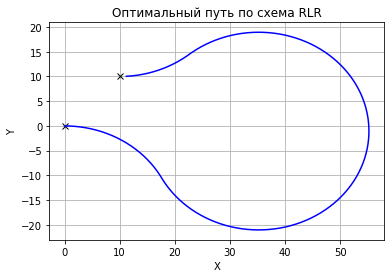

In [167]:
# Граничные точки задачи в формате:
# [x, y, theta (в градусах)]
pt1 = [0,0,0]
pt2 = [10,10,180]
pt3 = [10,150,90]
pt4 = [0,0,90]

pt0 = pt1
ptf = pt2

curvature = 0.05

param, T = calcPath(pt0, ptf, curvature)
path = scheme_traj(param)

plt.plot(pt0[0],pt0[1],'kx')
plt.plot(ptf[0],ptf[1],'kx')
plt.plot(path[:,0],path[:,1],'b-')
plt.grid(True)
#plt.axis("equal")
plt.title('Оптимальный путь по схема {scheme}'.format(scheme = param.type.name),)
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

In [170]:
print('Оптимальное время: ', round(T*param.turn_radius,2),'сек')

Оптимальное время:  155.99 сек


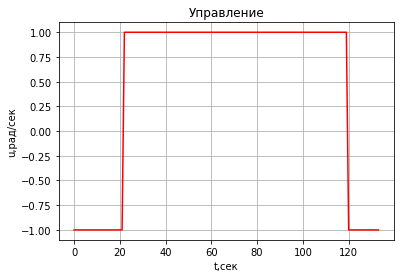

In [171]:
U = []
for symb in param.type.name:
    if symb == 'R':
        U.append(-1)
    if symb == 'L':
        U.append(1)
    if symb == 'S':
        U.append(0)

u = np.array([])
for i in range(3):
    u_i = U[i]*np.ones(round(param.seg_final[i] * param.turn_radius))
    u = np.append(u,u_i)
  
       
plt.plot(np.linspace(0,len(u)-1,len(u)),u,'r-')
plt.grid(True)
#plt.axis("equal")
plt.title('Управление')
plt.xlabel('t,сек')
plt.ylabel('u,рад/сек')

plt.show()
